Machine Learning Project: Song Stream Prediction, a study of predictive models for music streaming trends and analysis


Name: Dhavalashri Prasad

Net-ID: dxp210085

References: 

https://www.youtube.com/watch?v=nYlrecbFhfI

https://medium.com/mlearning-ai/neural-network-theory-and-implementation-for-regression-9e35afd60a51

https://machinelearningmastery.com/xgboost-for-regression/

In [112]:
import plotly.express as px
import pandas as pd
import statsmodels.api as sm
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import numpy as np

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)


In [113]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")
streams_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Streams_dp.csv")


In [114]:
features_df.head()

,id,name,duration,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,danceability
0,0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,3.33,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,0.514
1,7qiZfU4dY1lWllzX7mPBI3,Shape of You,3.90,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,0.931,95.977,0.825
2,2XU0oxnq2qxCpomAAuJY8K,Dance Monkey,3.49,0.588,6,-6.400,0,0.0924,0.69200,0.000104,0.1490,0.513,98.027,0.824
3,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,3.04,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,0.501
4,0e7ipj03S05BNilyu5bRzt,Rockstar,3.64,0.520,5,-6.136,0,0.0712,0.12400,0.000070,0.1310,0.129,159.801,0.585


In [115]:
streams_df.head()

,Song,Artist,Streams (Billions),Release Date
0,Blinding Lights,The Weeknd,3.449,29-Nov-19
1,Shape of You,Ed Sheeran,3.398,6-Jan-17
2,Dance Monkey,Tones And I,2.770,10-May-19
3,Someone You Loved,Lewis Capaldi,2.680,8-Nov-18
4,Rockstar,Post Malone featuring 21 Savage,2.620,15-Sep-17


In [116]:
streams_df.isna().sum()

Song                  0
Artist                0
Streams (Billions)    0
Release Date          0
dtype: int64

In [117]:
features_df.isna().sum()

id                  0
name                0
duration            0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
danceability        0
dtype: int64

Exploratory Data Analysis

In [148]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")

fig = go.Figure(data=go.Scatter(x=features_df["loudness"], y=features_df["energy"],
mode='markers',
marker=dict(color='blue'),
hovertext=[f"Name: {n}<br>Duration: {d}"
for n, d in zip(features_df['name'], features_df['duration'])]))

fig.update_layout(title='Relationship between loudness and energy',
xaxis_title='Loudness', yaxis_title='Energy')

fig.show()

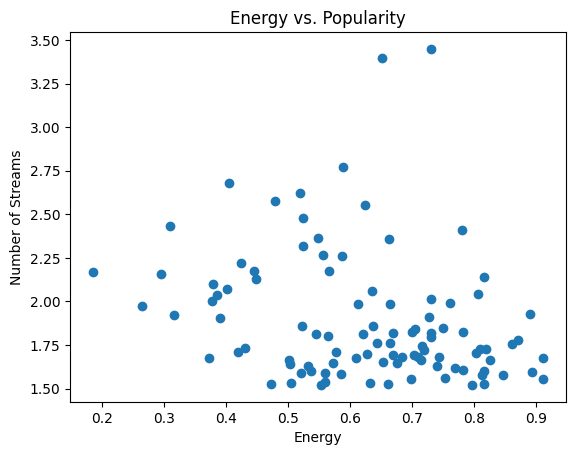

In [119]:
plt.scatter(features_df["energy"], streams_df["Streams (Billions)"])
plt.xlabel("Energy")
plt.ylabel("Number of Streams")
plt.title("Energy vs. Popularity")
plt.show()


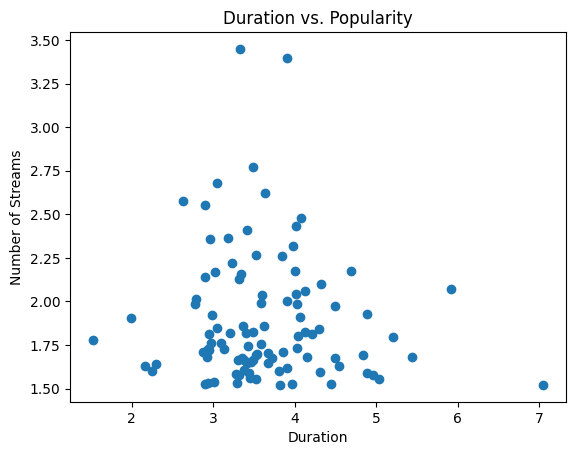

In [228]:
plt.scatter(features_df["duration"], streams_df["Streams (Billions)"])
plt.xlabel("Duration")
plt.ylabel("Number of Streams")
plt.title("Duration vs. Popularity")
plt.show()


In [149]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")

fig = go.Figure(data=go.Scatter(x=features_df["speechiness"], y=features_df["energy"],
mode='markers',
marker=dict(color='blue'),
hovertext=[f"Name: {n}<br>Energy: {e}<br>Speechiness: {s}"
for n, e, s in zip(features_df['name'], features_df['energy'], features_df['speechiness'])]
))

fig.update_layout(title='Energy vs. Speechiness',
xaxis_title='Speechiness', yaxis_title='Energy')

fig.show()

In [222]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")

fig = go.Figure(data=go.Scatter(x=features_df["speechiness"], y=features_df["acousticness"],
mode='markers',
marker=dict(color='blue'),
hovertext=[f"Name: {n}<br>acousticness: {e}<br>speechiness: {s}"
for n, e, s in zip(features_df['name'], features_df['speechiness'], features_df['acousticness'])]
))

fig.update_layout(title='Acousticness vs Speechiness',
xaxis_title='Speechiness', yaxis_title='Acousticness')

fig.show()

In [157]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")

fig = go.Figure(data=go.Scatter(x=features_df["valence"], y=features_df["tempo"],
mode='markers',
marker=dict(color='blue'),
hovertext=[f"Name: {n}<br>Danceability: {e}<br>Valence: {s}"
for n, e, s in zip(features_df['name'], features_df['valence'], features_df['danceability'])]
))

fig.update_layout(title='Danceability vs. Valence',
xaxis_title='Valence', yaxis_title='Danceability')

fig.show()

In [345]:
fig = go.Figure(data=go.Scatter(x=features_df["tempo"], y=features_df["danceability"],
mode='markers',
marker=dict(color='blue'),
hovertext=[f"Name: {n}<br>tempo: {e}<br>danceability: {s}"
for n, e, s in zip(features_df['name'], features_df['tempo'], features_df['danceability'])]
))

fig.update_layout(title='Tempo vs. Danceability',
xaxis_title='Tempo', yaxis_title='Danceability')

fig.show()

In [124]:
features_df = pd.read_csv("C:\\Users\\deeee\\Downloads\\Features_dp.csv")
corr_matrix = features_df.corr()
fig = go.Figure(data=go.Heatmap(
z=corr_matrix.values,
x=corr_matrix.index.values,
y=corr_matrix.columns.values,
colorscale='RdBu',
colorbar=dict(title='Correlation')
))
fig.update_layout(title='Correlation Matrix of Audio Features',
xaxis_title='', yaxis_title='')

fig.show()

C:\Users\deeee\AppData\Local\Temp\ipykernel_16704\3607800477.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [155]:
artist_streams = streams_df.groupby('Artist')['Streams (Billions)'].sum()

top_artists = artist_streams.sort_values(ascending=False).head(10)

top_artists_df = streams_df[streams_df['Artist'].isin(top_artists.index)]

fig = px.bar(top_artists_df, x="Artist", y="Streams (Billions)", title="Top 10 Most Streamed Artists")
fig.show()


In [272]:
fig = px.scatter(df, x='acousticness', y='energy', trendline='ols', title='Acousticness vs Energy')
fig.show()

In [259]:
a=features_df.groupby(['key', 'mode']).size().sort_values(ascending=False)
a

key  mode
1    1       11
2    1        8
7    1        7
6    0        6
10   1        6
8    1        6
0    1        6
6    1        5
9    0        5
4    1        5
11   0        4
10   0        4
11   1        4
5    1        4
4    0        4
1    0        4
0    0        3
7    0        2
9    1        2
8    0        1
5    0        1
3    1        1
     0        1
dtype: int64

In [260]:
a.loc[(slice(None), 1),].sum()

65

This means that 65% of the songs in this dataset are in the Major scale.

In [263]:
streams_df.rename(columns = {'Song':'name'}, inplace = True)

df = pd.merge(features_df, streams_df, on='name')

fig = px.histogram(df, x='mode', y='valence', title='Mode vs Valence')
fig.show()

Mode = 1 : Major scale


Mode = 0 : Minor scale


Different Machine Learning models implementation

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

X = df.drop(["id","mode","name", "Artist", "Streams (Billions)", "Release Date"], axis=1)
y = df["Streams (Billions)"]

In [293]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Linear Regression

In [297]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=0.2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

train_acc = model.score(X_train, y_train)
print("Training Set Accuracy:", train_acc)

test_acc = r2_score(y_test, y_pred)
print("Test Set Accuracy:", test_acc)


Mean Squared Error: 0.00013080393655552267
Training Set Accuracy: 0.9991203248624334
Test Set Accuracy: 0.999023295355255


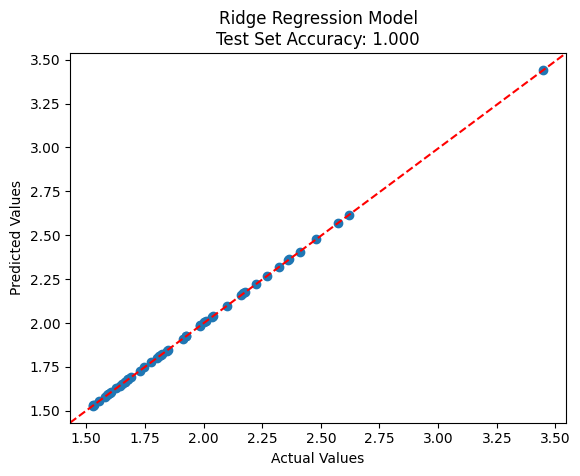

In [337]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=1)

plt.plot([0, 1], [0, 1], transform=plt.gca().transAxes, color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Model\nTest Set Accuracy: {:.3f}'.format(test_acc))

plt.show()


Random Forest Regressor

In [276]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

train_acc = model.score(X_train, y_train)
print("Training Set Accuracy:", train_acc)

test_acc = r2_score(y_test, y_pred)
print("Test Set Accuracy:", test_acc)



Mean Squared Error: 0.006546288629999873
Training Set Accuracy: 1.0
Test Set Accuracy: 0.9666459684117473


Support Vector Regressor

In [320]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'C': [15, 10, 2], 'gamma': [15, 10, 2]}

# Train a support vector regressor model with grid search for hyperparameters
model = GridSearchCV(SVR(kernel='linear'), param_grid, cv=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

train_acc = model.score(X_train, y_train)
print("Training Set Accuracy:", train_acc)

test_acc = model.score(X_test, y_test)
print("Test Set Accuracy:", test_acc)

print("Best hyperparameters:", model.best_params_)


Mean Squared Error: 0.004464783185325001
Training Set Accuracy: 0.9598649060706137
Test Set Accuracy: 0.9666617489525248
Best hyperparameters: {'C': 15, 'gamma': 15}


XGB Regressor

In [325]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.1, 1, 2],
              'max_depth': [3, 5, 7],
              'subsample': [0.5, 0.8, 1.0],
              'colsample_bytree': [0.5, 0.8, 1.0],
              'reg_alpha': np.logspace(-4, 0, 5)}

model = XGBRegressor(objective='reg:squarederror', reg_alpha=0.1)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("R^2 score on test set: ", grid_search.score(X_test, y_test))

Fitting 5 folds for each of 1215 candidates, totalling 6075 fits
Best hyperparameters:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0.0001, 'subsample': 0.8}
R^2 score on test set:  0.9966845351822086


Neural Network Regressor

In [326]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(learning_rate=0.0001):
    model = keras.Sequential()
    model.add(layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(layers.Dense(64, activation='linear'))
    model.add(layers.Dense(1, activation='linear'))

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model

regressor = keras.wrappers.scikit_learn.KerasRegressor(build_fn=create_model, verbose=0)

param_grid = {'batch_size': [8, 16, 32], 'epochs': [50, 100, 150], 'learning_rate': [0.001, 0.01, 0.1]}

grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


C:\Users\deeee\AppData\Local\Temp\ipykernel_16704\1839606552.py:20: DeprecationWarning:

KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.



Best Parameters: {'batch_size': 8, 'epochs': 150, 'learning_rate': 0.01}
R^2 Score: 0.9972969806931828


K-Means Clustering

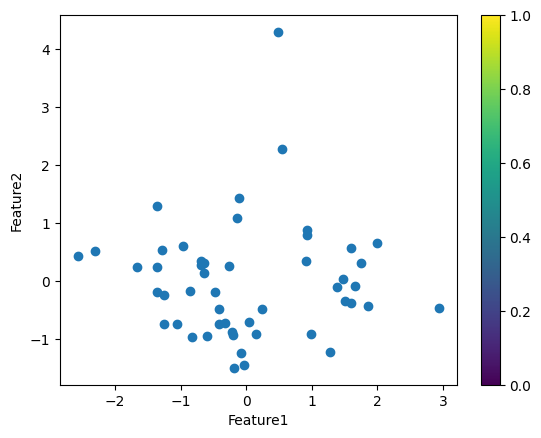

In [341]:
X = df.drop(['id','name','duration','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','danceability'], axis=1)  # Features
y = df['Streams (Billions)']  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_test)

pca = PCA(n_components=2)

# Fit the PCA model to your data
pca.fit(X_scaled)

# Transform your data into the principal component space
X_pca = pca.transform(X_scaled)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.colorbar()
plt.show()

Elbow point computation

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

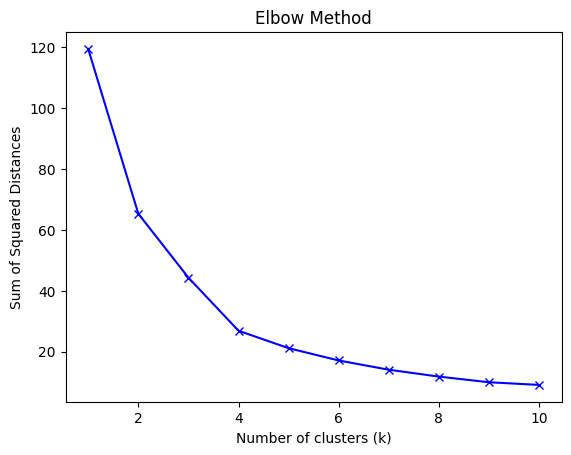

In [342]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



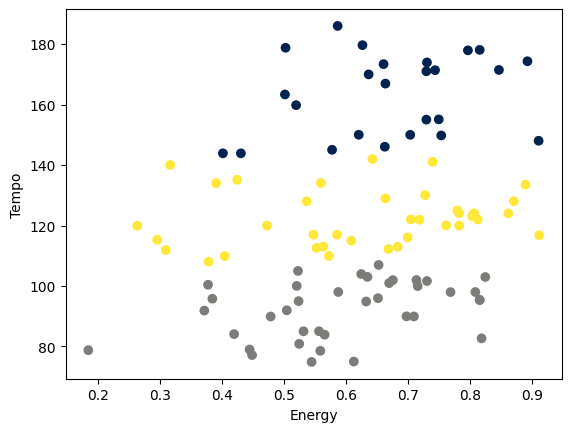

In [343]:
X = df[['energy', 'tempo', 'Streams (Billions)']]

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

df['cluster'] = kmeans.labels_

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans.labels_, cmap='cividis')
plt.xlabel('Energy')
plt.ylabel('Tempo')
plt.title('')
plt.show()

In [344]:
df_clustering = df[['id', 'name', 'duration', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'danceability']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering.iloc[:,2:])
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)

df_clustering['cluster'] = kmeans.labels_

fig = px.scatter_3d(df_clustering, x='energy', y='loudness', z='tempo', color='cluster', hover_name='name', hover_data=['duration', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'danceability'])
fig.show()

c:\Users\deeee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\deeee\AppData\Local\Temp\ipykernel_16704\3047280770.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

